<a href="https://colab.research.google.com/github/ankit-genzeon/AI-ML-Bootcamp-Genzeon-2023/blob/master/K_Means_Mall_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
dataset='/content/drive/MyDrive/Colab Notebooks/DataSet/Mall_Customers.csv'

import pandas as pd
df=pd.read_csv(dataset)

In [ ]:
df=df.drop(['CustomerID'],axis=1)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
print(df.isna().sum())

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])

In [ ]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

<Axes: >

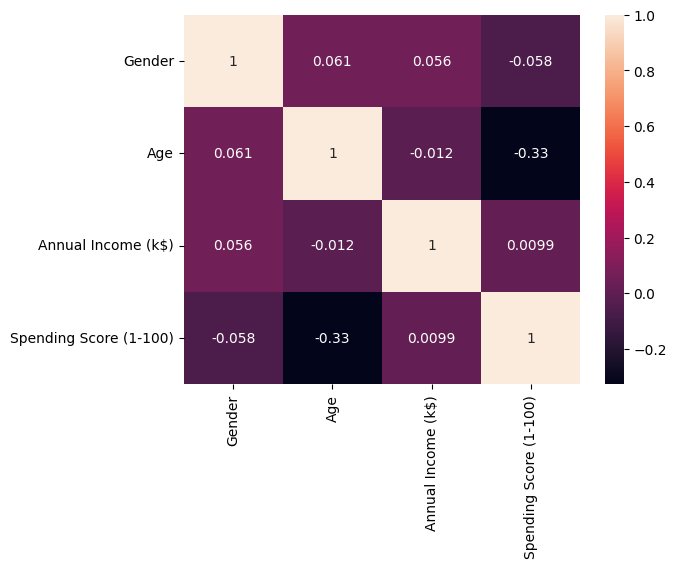

In [ ]:
#Visualization

import seaborn as sns
data=df[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']]
sns.heatmap(data.corr(),annot=True)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

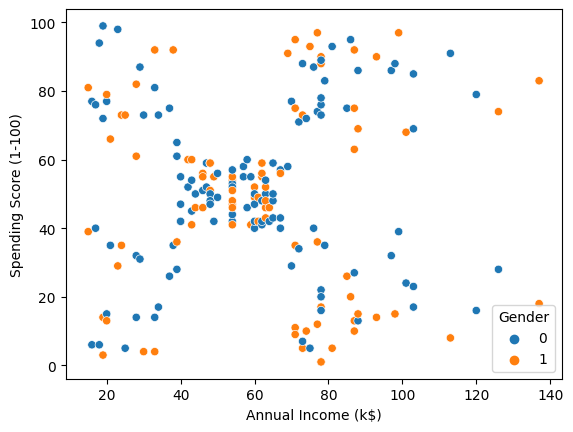

In [ ]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')

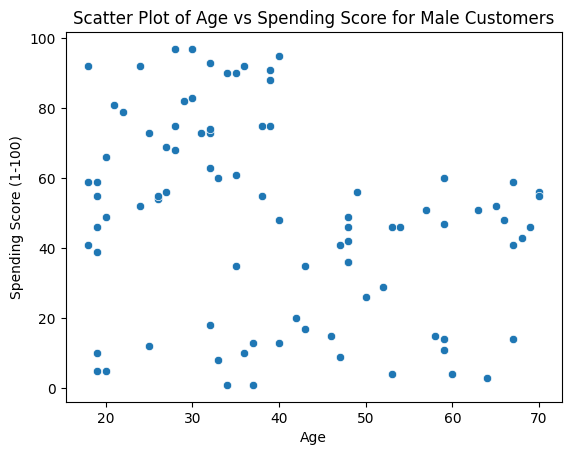

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe for female customers
male_df = df[df['Gender'] == 1]

# Create the scatter plot
sns.scatterplot(data=male_df, x='Age', y='Spending Score (1-100)')

# Set plot title and axes labels
plt.title('Scatter Plot of Age vs Spending Score for Male Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

# Display the plot
plt.show()

In [ ]:
#After Preprocessing

from sklearn.cluster import KMeans

#Initiate the model
Km=KMeans(n_clusters=5) #it will create two centrioids -> which datapoint into which cluster

clusters=Km.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [ ]:
df['label']=clusters

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4


In [ ]:
import pandas as pd

# Create a new DataFrame with age, income, gender, and spending score values
new_data = pd.DataFrame({'Age': [19, 30, 25, 35],
                         'Annual Income (k$)': [20, 50, 60, 75],
                         'Gender': ['Male', 'Male', 'Female', 'Male'],
                         'Spending Score (1-100)': [5, 40, 55, 90]})

# Preprocess the data
new_data['Gender'] = label_encoder.transform(new_data['Gender'])

# Predict the cluster labels for new data
new_data_labels = Km.predict(new_data[['Gender','Age', 'Annual Income (k$)','Spending Score (1-100)']])

# Add the predicted cluster labels to the new_data DataFrame
new_data['Cluster Label'] = new_data_labels

# Print the new_data DataFrame with predicted cluster labels
print(new_data)


   Age  Annual Income (k$)  Gender  Spending Score (1-100)  Cluster Label
0   19                  20       1                       5              4
1   30                  50       1                      40              1
2   25                  60       0                      55              1
3   35                  75       1                      90              2


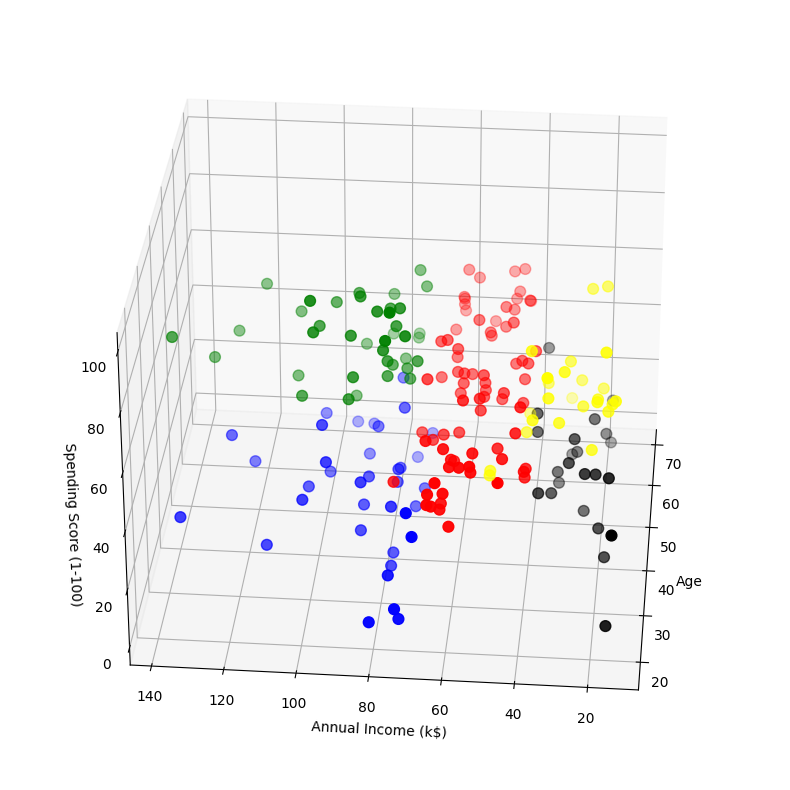

In [ ]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='yellow', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='black', s=60)


ax.view_init(30, 185)

plt.xlabel("Age")

plt.ylabel("Annual Income (k$)")

ax.set_zlabel('Spending Score (1-100)')

plt.show()

In [ ]:
print (new_data)

   Age  Annual Income (k$)  Gender  Spending Score (1-100)  Cluster Label
0   19                  20       1                       5              4
1   30                  50       1                      40              1
2   25                  60       0                      55              1
3   35                  75       1                      90              2


In [ ]:
#lets plot wcss vs k(num of clusters) -> withing cluster sum of squares

# lets plot WCSS vs k(num of clusters)

#calculate WCSS for diff K values

In [ ]:
wcss=[]
for k in range(1,11):
  Kmeans=KMeans(n_clusters=k)
  Kmeans.fit(df)

  wcss.append(Kmeans.inertia_)

  #computing WCSS for fitted model using intertia_ attribute of K means instance : Interia :: How far is the datapoint from centroid
  #lower the value better the cluster

  print(wcss)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,6))

plt.plot(range(1,11),wcss,color="red",marker="*")
plt.grid()
plt.xlabel("K values --------------->")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Wcss -- Variance error------->")

In [ ]:
pip install flask
